# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datset

In [2]:
data = pd.read_csv(r"apple_stocks.csv")

# Data Preprocessing

In [3]:
data.head(2)

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782


In [4]:
data.shape

(129, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    129 non-null    object 
 1   Open    129 non-null    float64
 2   High    129 non-null    float64
 3   Low     129 non-null    float64
 4   Close   129 non-null    float64
 5   Volume  129 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB


In [6]:
data = data.drop(columns=['Date'])

In [9]:
data.head(2)

,Open,High,Low,Close,Volume
0,142.90,144.75,142.90,144.18,19201712
1,143.02,143.50,142.41,142.73,24128782


In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()

In [12]:
data_scaled = scaler.fit_transform(data)

In [13]:
data_scaled

array([[ 2.80254990e-01,  3.70772738e-01,  3.61009859e-01,
         3.91496955e-01, -6.56506684e-01],
       [ 2.91198805e-01,  2.56788326e-01,  3.15061299e-01,
         2.56486805e-01, -2.45018905e-01],
       [ 3.52301774e-01,  3.74420239e-01,  3.44130796e-01,
         3.83117015e-01, -4.58754413e-01],
       [ 4.60827942e-01,  4.20925880e-01,  3.79764373e-01,
         3.28181850e-01, -1.06772671e+00],
       [ 4.21612604e-01,  3.89922119e-01,  4.43529721e-01,
         3.76599284e-01, -3.37276629e-01],
       [ 4.45324203e-01,  4.05423999e-01,  3.02870865e-01,
         3.44941731e-01,  3.70540861e-01],
       [ 4.25260542e-01,  4.94787779e-01,  3.85390728e-01,
         5.45129195e-01, -4.15921291e-01],
       [ 4.72683741e-01,  4.99347155e-01,  4.28526110e-01,
         3.49597253e-01, -1.92144354e-01],
       [ 6.69672416e-01,  6.92664719e-01,  5.93565835e-01,
         5.44198091e-01, -1.14435486e-01],
       [ 4.83627557e-01,  5.90534685e-01,  5.68247241e-01,
         5.87028897e-01

# K-Means clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
inertia_value = []
silhouette_value = []

K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    # Inhertia - WCSS
    inertia_value.append(kmeans.inertia_)

    #silhoutte score
    sil_score = silhouette_score(data_scaled,kmeans.labels_)
    silhouette_value.append(sil_score)

C:\Users\rites\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rites\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rites\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rites\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
inertia_value

[270.7220565693662,
 209.3118953250689,
 137.8924622984574,
 91.53579353882208,
 80.54884827077097,
 48.444761470514216,
 40.984964191752965,
 33.812067154512754,
 30.27739980192262]

In [19]:
silhouette_value

[np.float64(0.5943053482816468),
 np.float64(0.5282771915643042),
 np.float64(0.4114303425337032),
 np.float64(0.5203978511345053),
 np.float64(0.4472285973704731),
 np.float64(0.4601143137989442),
 np.float64(0.47565437765651786),
 np.float64(0.489923110277672),
 np.float64(0.4462988144751593)]

# Choose the number of clustering

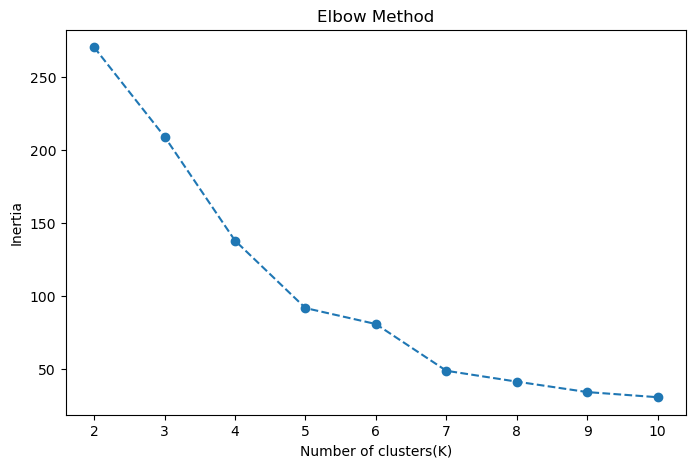

In [24]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_value, marker='o',linestyle='--')

plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')

plt.title('Elbow Method')
plt.show()

In [22]:
print('Optimal cluster is 5')

Optimal cluster is 5


# Perform K-means clustering

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [26]:
kmeans.fit(data_scaled)

C:\Users\rites\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [27]:
cluster = kmeans.predict(data_scaled)

In [28]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [29]:
data['Cluster']= cluster

In [33]:
data.to_csv('cluster_apaple_stock.csv')

In [35]:
data.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
Cluster    0
dtype: int64

In [36]:
data.duplicated().sum()

np.int64(0)

# Hierarchical Clustering:

In [37]:
import scipy.cluster.hierarchy as sch

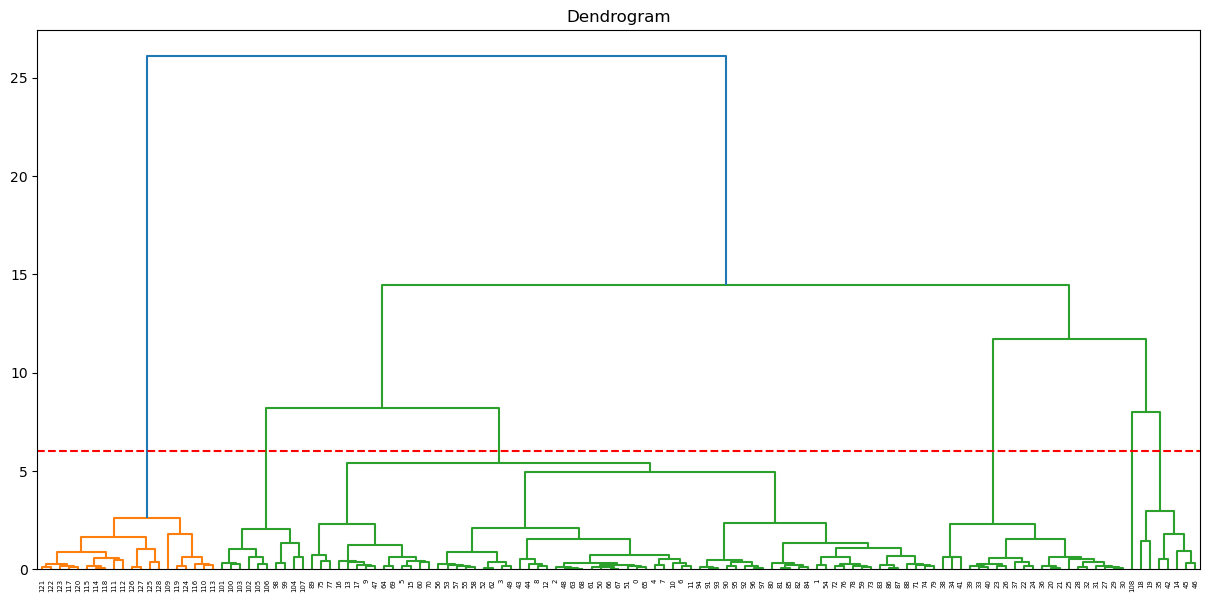

In [40]:
plt.figure(figsize=(15,7))
plt.title('Dendrogram')

sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=6,color='r',linestyle='--')
plt.show()

In [39]:
print('Optimal cluster is 6')

Optimal cluster is 6


In [42]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
hier_cluster = AgglomerativeClustering(n_clusters=6, metric="euclidean",linkage="ward")

In [48]:
cluster_pred = hier_cluster.fit_predict(data_scaled)

In [49]:
cluster_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
data['agg_cluster'] = cluster_pred

In [55]:
data.head()

,Open,High,Low,Close,Volume,Cluster,cluster,agg_cluster
0,142.90,144.75,142.90,144.18,19201712,0,0,0
1,143.02,143.50,142.41,142.73,24128782,0,0,0
2,143.69,144.79,142.72,144.09,21569557,0,0,0
3,144.88,145.30,143.10,143.50,14277848,0,0,0
4,144.45,144.96,143.78,144.02,23024107,0,0,0


In [59]:
data=data.drop('cluster',axis=1)

In [60]:
data.head()

,Open,High,Low,Close,Volume,Cluster,agg_cluster
0,142.90,144.75,142.90,144.18,19201712,0,0
1,143.02,143.50,142.41,142.73,24128782,0,0
2,143.69,144.79,142.72,144.09,21569557,0,0
3,144.88,145.30,143.10,143.50,14277848,0,0
4,144.45,144.96,143.78,144.02,23024107,0,0


In [61]:
data.describe()

,Open,High,Low,Close,Volume,Cluster,agg_cluster
count,129.000000,129.000000,129.000000,129.000000,1.290000e+02,129.000000,129.000000
mean,139.826977,140.683953,139.050155,139.975349,2.706259e+07,1.387597,1.100775
std,11.007846,11.009166,10.705675,10.781804,1.202048e+07,1.567791,1.440730
min,115.800000,116.330000,114.760000,116.020000,1.424635e+07,0.000000,0.000000
25%,135.670000,136.270000,135.100000,135.720000,2.035000e+07,0.000000,0.000000
50%,142.110000,142.920000,141.110000,142.270000,2.357509e+07,1.000000,0.000000
75%,145.740000,147.140000,144.940000,145.870000,3.037938e+07,3.000000,2.000000
max,156.010000,156.650000,155.050000,156.100000,1.119850e+08,4.000000,5.000000


In [62]:
x=data["Low"]<120

In [64]:
x.sum()


np.int64(15)

In [66]:
y=data["Open"]>180

In [67]:
y.sum()

np.int64(0)

In [74]:
filtered_data = (data['Close'] > 130) & (data['Close'] < 150)
filtered_data.sum()

np.int64(83)